In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


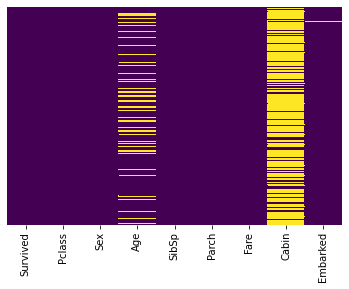

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

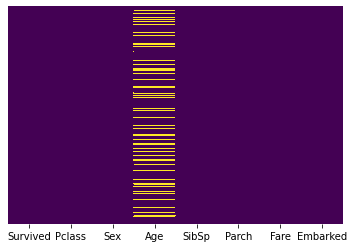

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

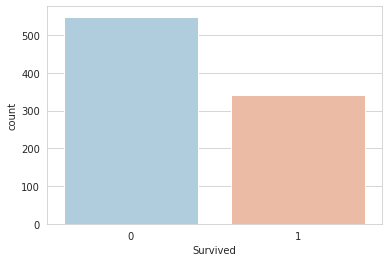

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data, palette='RdBu_r')

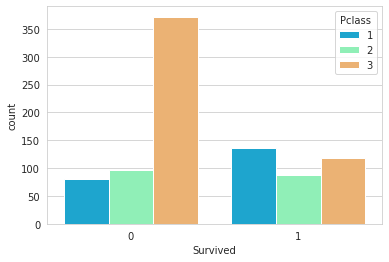

In [ ]:
sns.countplot(x='Survived',hue='Pclass', data=data, palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


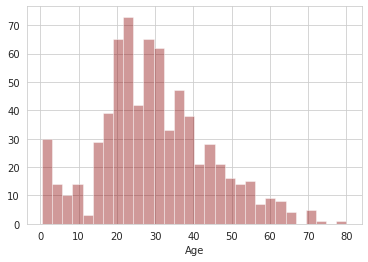

In [ ]:
sns.distplot(data['Age'], kde=False,color='darkred',bins=30)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data = pd.get_dummies(data, columns = ['Embarked','Sex','Pclass','SibSp','Parch'],drop_first=True)
data.head()

,Survived,Age,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.0,7.2500,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,35.0,53.1000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

Survived        0
Age           177
Fare            0
Embarked_Q      0
Embarked_S      0
Sex_male        0
Pclass_2        0
Pclass_3        0
SibSp_1         0
SibSp_2         0
SibSp_3         0
SibSp_4         0
SibSp_5         0
SibSp_8         0
Parch_1         0
Parch_2         0
Parch_3         0
Parch_4         0
Parch_5         0
Parch_6         0
dtype: int64

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
dtype: int64

In [ ]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 19), (623,), (268, 19), (268,))

In [ ]:
print(X)

      Age     Fare  Embarked_Q  Embarked_S  ...  Parch_3  Parch_4  Parch_5  Parch_6
0    22.0   7.2500           0           1  ...        0        0        0        0
1    38.0  71.2833           0           0  ...        0        0        0        0
2    26.0   7.9250           0           1  ...        0        0        0        0
3    35.0  53.1000           0           1  ...        0        0        0        0
4    35.0   8.0500           0           1  ...        0        0        0        0
..    ...      ...         ...         ...  ...      ...      ...      ...      ...
886  27.0  13.0000           0           1  ...        0        0        0        0
887  19.0  30.0000           0           1  ...        0        0        0        0
888  28.0  23.4500           0           1  ...        0        0        0        0
889  26.0  30.0000           0           0  ...        0        0        0        0
890  32.0   7.7500           1           0  ...        0        0        0  

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Efficient Method
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.6791044776119403,
 'Logistic Regression': 0.8097014925373134,
 'Random Forest': 0.7761194029850746}

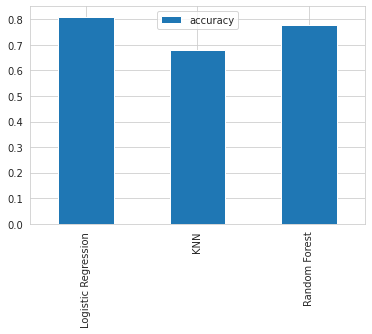

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

In [ ]:
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}

In [ ]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [ ]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
        "max_depth": [None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
np.random.seed(42)

rs_log_reg  = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit the Hyperparameter model with Logistic Regression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'C': 29.763514416313132, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.7985074626865671

In [ ]:
np.random.seed(42)

rf_for = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rf_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit the Hyperparameter model with Logistic Regression

rf_for.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rf_for.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 910}

In [ ]:
rf_for.score(X_test,y_test)

0.8059701492537313

In [ ]:
y_pred =rs_log_reg.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


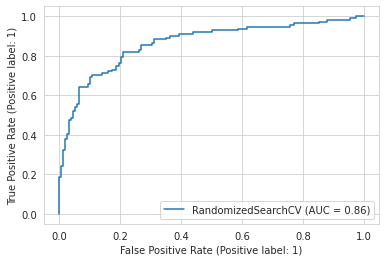

In [ ]:
plot_roc_curve(rs_log_reg,X_test,y_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[135  22]
 [ 32  79]]


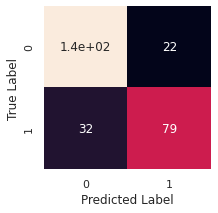

In [ ]:
sns.set(font_scale=1)

def plot_conf_mat(y_test,y_pred):
  fig , ax=plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                   annot=True,
                   cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

plot_conf_mat(y_test, y_pred)

In [ ]:
# Without Cross-Validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       157
           1       0.78      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

